Flight demand throughout the year.

In [7]:
# Import the dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
file_path = Path("../Data/CSV/cleaned_flight_data.csv")

In [3]:
# Create a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,tbl,Year,quarter,departure_city_id,arrival_city_id,departure_city,arrival_city,departure_airport_id,arrival_airport_id,departure_airport,...,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl1apk,departure_latitude,departure_longitude,arrival_latitude,arrival_longitude
0,Table 1a,2010,1,34614,33195,"Salt Lake City, UT","Tampa, FL (Metropolitan Area)",14869,15304,SLC,...,0.38,247.69,US Airways Group Inc.,0.20,166.99,201011486915304SLCTPA,40.758478,-111.888142,37.860600,-78.804199
1,Table 1a,1998,4,30189,31703,"Colorado Springs, CO","New York City, NY (Metropolitan Area)",11109,12197,COS,...,0.73,292.60,Northwest Airlines Inc.,0.24,248.27,199841110912197COSHPN,38.835224,-104.819798,40.123164,-75.333718
2,Table 1a,1998,4,30198,30852,"Pittsburgh, PA","Washington, DC (Metropolitan Area)",14122,10821,PIT,...,0.93,245.70,Continental Airlines Inc.,0.03,71.30,199841412210821PITBWI,40.442169,-79.994945,38.892062,-77.019912
3,Table 1a,2009,3,32211,32575,"Las Vegas, NV","Los Angeles, CA (Metropolitan Area)",12889,14908,LAS,...,0.58,118.28,US Airways Group Inc.,0.41,102.75,200931288914908LASSNA,36.169202,-115.140597,34.052238,-118.243344
4,Table 1a,1993,4,30255,30852,"Huntsville, AL","Washington, DC (Metropolitan Area)",12217,12264,HSV,...,0.48,275.50,United Air Lines Inc.,0.25,197.69,199341221712264HSVIAD,34.729538,-86.585283,38.892062,-77.019912


In [5]:
# Group the data by year and quarter
grouped_df = df.groupby(["Year", "quarter"])

# Display the first 5 rows of the grouped DataFrame
grouped_df.apply(lambda x: x.head())

C:\Users\User\AppData\Local\Temp\ipykernel_15716\1703976893.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df.apply(lambda x: x.head())


tbl  Year  quarter  departure_city_id  \
Year quarter                                                      
1993 1       11      Table 1a  1993        1              31453   
             41      Table 1a  1993        1              30599   
             49      Table 1a  1993        1              31703   
             62      Table 1a  1993        1              33570   
             101     Table 1a  1993        1              32467   
...                       ...   ...      ...                ...   
2020 2       203394   Table1a  2020        2              30135   
             203395   Table1a  2020        2              30135   
             203396   Table1a  2020        2              30140   
             203397   Table1a  2020        2              30140   
             203398   Table1a  2020        2              30140   

                     arrival_city_id                         departure_city  \
Year quarter                                                                  
1993 1       11                32457                            Houston, TX   
             41                32575                         Birmingham, AL   
             49                34524  New York City, NY (Metropolitan Area)   
             62                30852                          San Diego, CA   
             101               33342          Miami, FL (Metropolitan Area)   
...                              ...                                    ...   
2020 2       203394            33195         Allentown/Bethlehem/Easton, PA   
             203395            33195         Allentown/Bethlehem/Easton, PA   
             203396            32575                        Albuquerque, NM   
             203397            30852                        Albuquerque, NM   
             203398            30194                        Albuquerque, NM   

                                              arrival_city  \
Year quarter                                                 
1993 1       11      San Francisco, CA (Metropolitan Area)   
             41        Los Angeles, CA (Metropolitan Area)   
             49                               Richmond, VA   
             62         Washington, DC (Metropolitan Area)   
             101                             Milwaukee, WI   
...                                                    ...   
2020 2       203394          Tampa, FL (Metropolitan Area)   
             203395          Tampa, FL (Metropolitan Area)   
             203396    Los Angeles, CA (Metropolitan Area)   
             203397     Washington, DC (Metropolitan Area)   
             203398                  Dallas/Fort Worth, TX   

                     departure_airport_id  arrival_airport_id  \
Year quarter                                                    
1993 1       11                     12266               13796   
             41                     10599               12954   
             49                     15070               14524   
             62                     14679               11278   
             101                    13303               13342   
...                                   ...                 ...   
2020 2       203394                 10135               14112   
             203395                 10135               15304   
             203396                 10140               10800   
             203397                 10140               10821   
             203398                 10140               11259   

                    departure_airport  ... large_ms  fare_lg  \
Year quarter                           ...                     
1993 1       11                   IAH  ...   0.6400   230.26   
             41                   BHM  ...   1.0000   290.64   
             49                   SWF  ...   0.8100   178.83   
             62                   SAN  ...   0.2600   343.23   
             101                  MIA  ...   0.5400   155.89   
...                      

In [6]:
# Get the number of flights for each quarter
flights_per_quarter = grouped_df["quarter"].count()

# Display the number of flights for each quarter
flights_per_quarter

Year  quarter
1993  1          2377
      2          2436
      3          2433
      4          2418
1994  1          2388
                 ... 
2018  1          2017
      2          2043
2019  3          2050
2020  1          2002
      2          1795
Name: quarter, Length: 98, dtype: int64

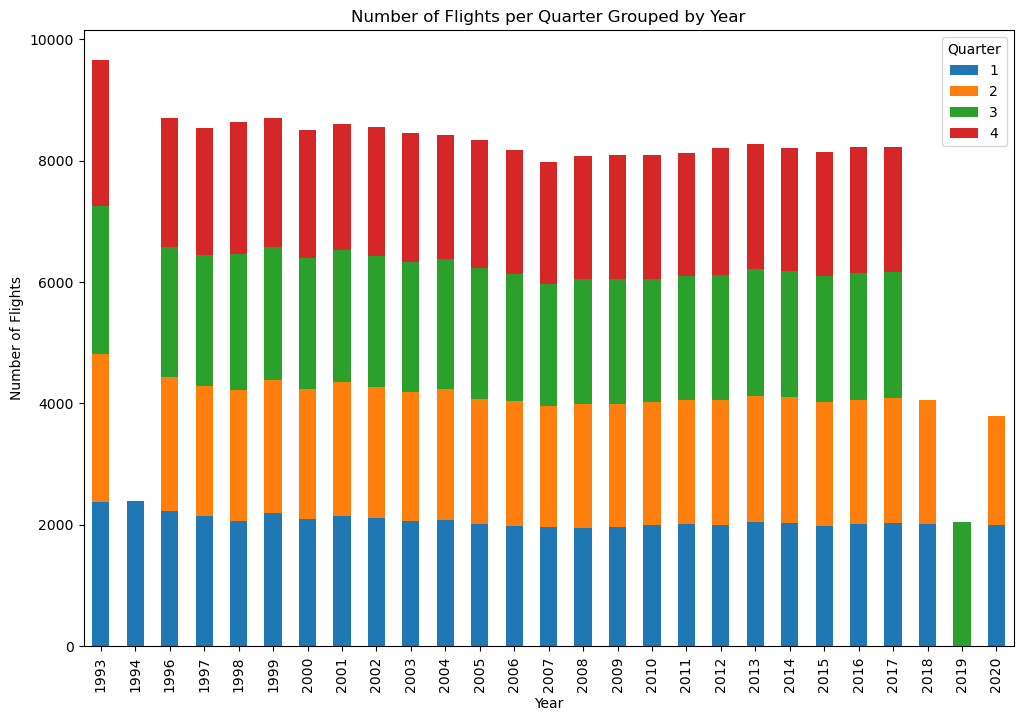

In [10]:
# Graph a bar chart of the number of flights for each quarter
flights_per_quarter.unstack().plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Flights per Quarter Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.legend(title='Quarter')
plt.show()

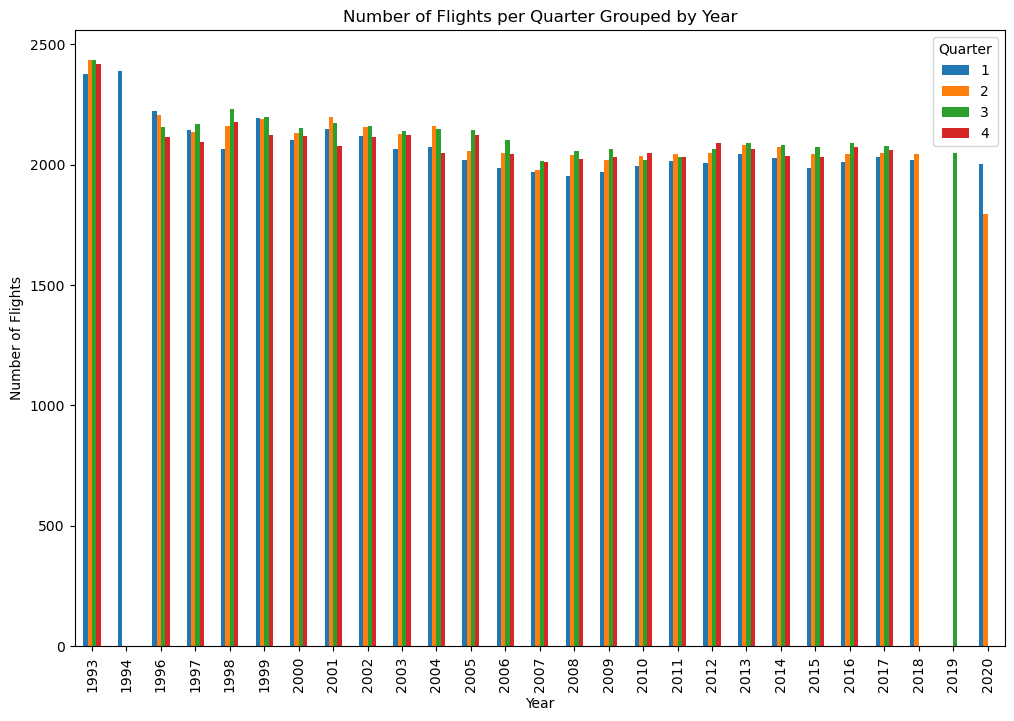

In [11]:
# Graph a bar chart of the number of flights for each quarter with quarters beside each other
flights_per_quarter.unstack().plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Number of Flights per Quarter Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.legend(title='Quarter')
plt.show()